In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## uploading the data

In [194]:
data=pd.read_csv("/content/TSLA.csv")

## Initial assessment of the data

In [195]:
data.head(30)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,9.986667,10.165333,9.770000,10.006667,10.006667,92826000
1,2014-01-03,10.000000,10.146000,9.906667,9.970667,9.970667,70425000
2,2014-01-06,10.000000,10.026667,9.682667,9.800000,9.800000,80416500
3,2014-01-07,9.841333,10.026667,9.683333,9.957333,9.957333,75511500
4,2014-01-08,9.923333,10.246667,9.917333,10.085333,10.085333,92448000
5,2014-01-09,10.166667,10.228667,9.790000,9.835333,9.835333,80730000
6,2014-01-10,9.897333,9.926667,9.483333,9.714667,9.714667,111691500
7,2014-01-13,9.718667,9.800000,9.188000,9.289333,9.289333,94741500
8,2014-01-14,9.366667,10.800000,9.111333,10.751333,10.751333,414105000
9,2014-01-15,11.230000,11.482000,10.806667,10.942000,10.942000,306984000


In [196]:
data.shape

(2640, 7)

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2640 non-null   object 
 1   Open       2640 non-null   float64
 2   High       2640 non-null   float64
 3   Low        2640 non-null   float64
 4   Close      2640 non-null   float64
 5   Adj Close  2640 non-null   float64
 6   Volume     2640 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 144.5+ KB


In [198]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## choosing the column for analysis and prediction

In [199]:
stock_data=data[["Date","Close"]]

In [200]:
stock_data

,Date,Close
0,2014-01-02,10.006667
1,2014-01-03,9.970667
2,2014-01-06,9.800000
3,2014-01-07,9.957333
4,2014-01-08,10.085333
...,...,...
2635,2024-06-24,182.580002
2636,2024-06-25,187.350006
2637,2024-06-26,196.369995
2638,2024-06-27,197.419998


In [201]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2640 non-null   object 
 1   Close   2640 non-null   float64
dtypes: float64(1), object(1)
memory usage: 41.4+ KB


In [202]:
stock_data["Date"]=pd.to_datetime(stock_data["Date"])## converting date into date time as date  column is an object form

In [203]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2640 non-null   datetime64[ns]
 1   Close   2640 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 41.4 KB


In [204]:
stock_data

,Date,Close
0,2014-01-02,10.006667
1,2014-01-03,9.970667
2,2014-01-06,9.800000
3,2014-01-07,9.957333
4,2014-01-08,10.085333
...,...,...
2635,2024-06-24,182.580002
2636,2024-06-25,187.350006
2637,2024-06-26,196.369995
2638,2024-06-27,197.419998


## why convert time into time series
in time series data it has a time component
There fore date colun should be the index colums
slilcing becomes easy
visualization becomes simple
libraries associates with time series assume there is time date column

In [205]:
stock_data=stock_data.set_index("Date")## makimg date column as index

In [206]:
stock_data

,Close
Date,
2014-01-02,10.006667
2014-01-03,9.970667
2014-01-06,9.800000
2014-01-07,9.957333
2014-01-08,10.085333
...,...
2024-06-24,182.580002
2024-06-25,187.350006
2024-06-26,196.369995


stastical analysis

In [207]:
stock_data.describe()

,Close
count,2640.000000
mean,98.338908
std,107.735125
min,9.289333
25%,16.015334
50%,22.528000
75%,197.632500
max,409.970001


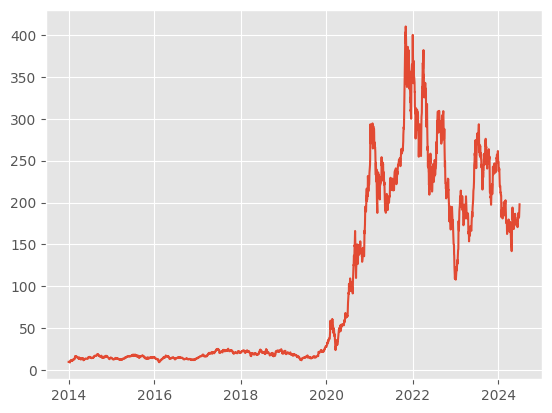

In [208]:
plt.plot(stock_data.Close)

In [209]:
plt.style.use("ggplot")
plt.figure(figsize=(10,8))
plt.grid(True)
plt.xlabel("Dates",fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("Close Prices",fontsize=20)
plt.yticks(fontsize=15)
plt.plot(stock_data["Close"],linewidth=3,color="blue")
plt.title("Tesla Stock Closing Price",fontsize=30)
plt.show()

TypeError: 'bool' object is not callable

<Figure size 1000x800 with 0 Axes>

## Distribution of the plot

In [ ]:
df_close=stock_data["Close"]
df_close.plot(kind="kde",figsize=(18,8),linewidth=3)
plt.xticks(fontsize=15)
plt.grid("both")
plt.ylabel("Density",fontsize=20)
plt.yticks(fontsize=15)
plt.show()


calculating simple smoothing average through rolling mean for 48 months

In [ ]:
rolling_mean=stock_data["Close"].rolling(48).mean()
rolling_std=stock_data["Close"].rolling(48).std()

In [211]:
rolling_std

Date
2014-01-02          NaN
2014-01-03          NaN
2014-01-06          NaN
2014-01-07          NaN
2014-01-08          NaN
                ...    
2024-06-24    11.052783
2024-06-25    10.925267
2024-06-26    10.985731
2024-06-27    10.763183
2024-06-28    10.287522
Name: Close, Length: 2640, dtype: float64

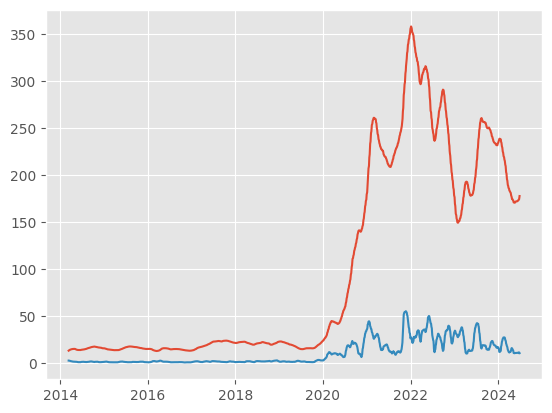

In [212]:
plt.plot(rolling_mean)
plt.plot(rolling_std)

In [213]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data["Close"])

In [214]:
adft

(-1.2450856883278907,
 0.6539067110159196,
 28,
 2611,
 {'1%': -3.432856986061305,
  '5%': -2.8626475938238967,
  '10%': -2.5673596115790938},
 16213.491121699)

In [215]:
pd.Series(adft[0:4],index=["test_stastistics","p_value","lag","no of data no_of_data_points"])

test_stastistics                  -1.245086
p_value                            0.653907
lag                               28.000000
no of data no_of_data_points    2611.000000
dtype: float64

In [216]:
def test_stationarity(timeseries):
    # Calculate rolling statistics
    rolmean = timeseries.rolling(window=48).mean()
    rolstd = timeseries.rolling(window=48).std()

    # Plot rolling statistics
    plt.figure(figsize=(18, 8))
    plt.grid(which='both')
    plt.plot(timeseries, color="blue", label="Original", linewidth=3)
    plt.plot(rolmean, color="red", label="Rolling Mean", linewidth=3)
    plt.plot(rolstd, color="black", label="Rolling Std", linewidth=3)
    plt.legend(loc="best", fontsize=20, shadow=True, facecolor="lightpink", edgecolor="k")
    plt.title("Rolling Mean and Standard Deviation", fontsize=25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show(block=False)

    # Perform Dickey-Fuller test
    print("Results of Dickey-Fuller Test:")
    adft = adfuller(timeseries, autolag="AIC")

In [218]:
test_stationarity(stock_data["Close"])

TypeError: 'bool' object is not callable

<Figure size 1800x800 with 0 Axes>

In [219]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=12)

In [220]:
result.seasonal

Date
2014-01-02   -0.032377
2014-01-03   -0.448471
2014-01-06   -0.470175
2014-01-07    0.167847
2014-01-08    0.038369
                ...   
2024-06-24    0.115648
2024-06-25    0.013611
2024-06-26    0.049751
2024-06-27   -0.314346
2024-06-28    0.321219
Name: seasonal, Length: 2640, dtype: float64

<Figure size 2000x1000 with 0 Axes>

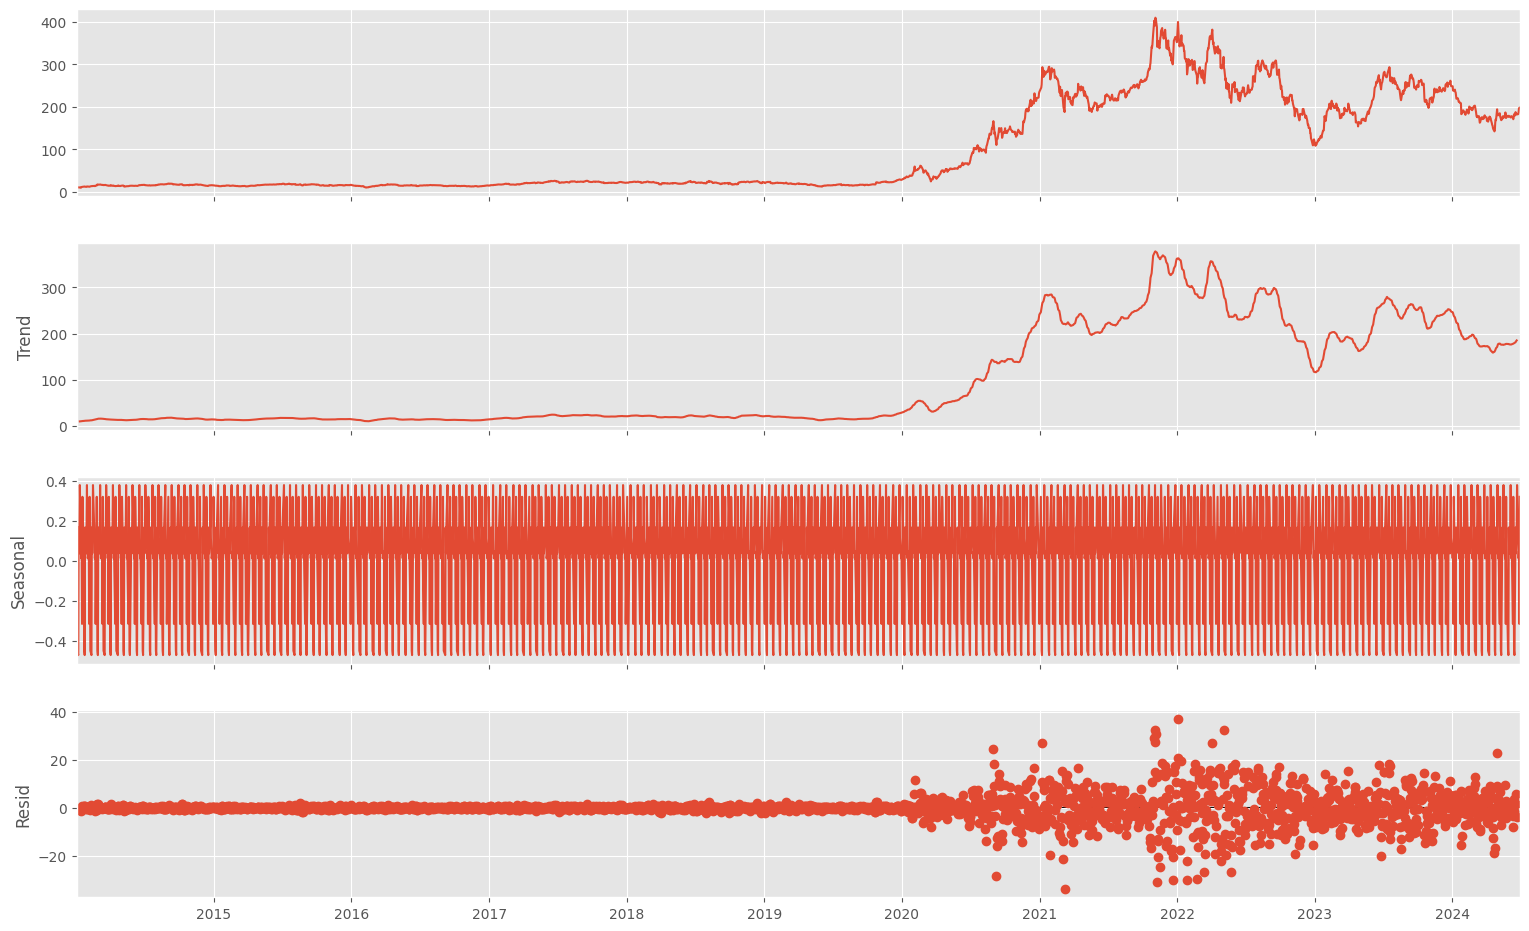

In [221]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

<Figure size 2000x1000 with 0 Axes>

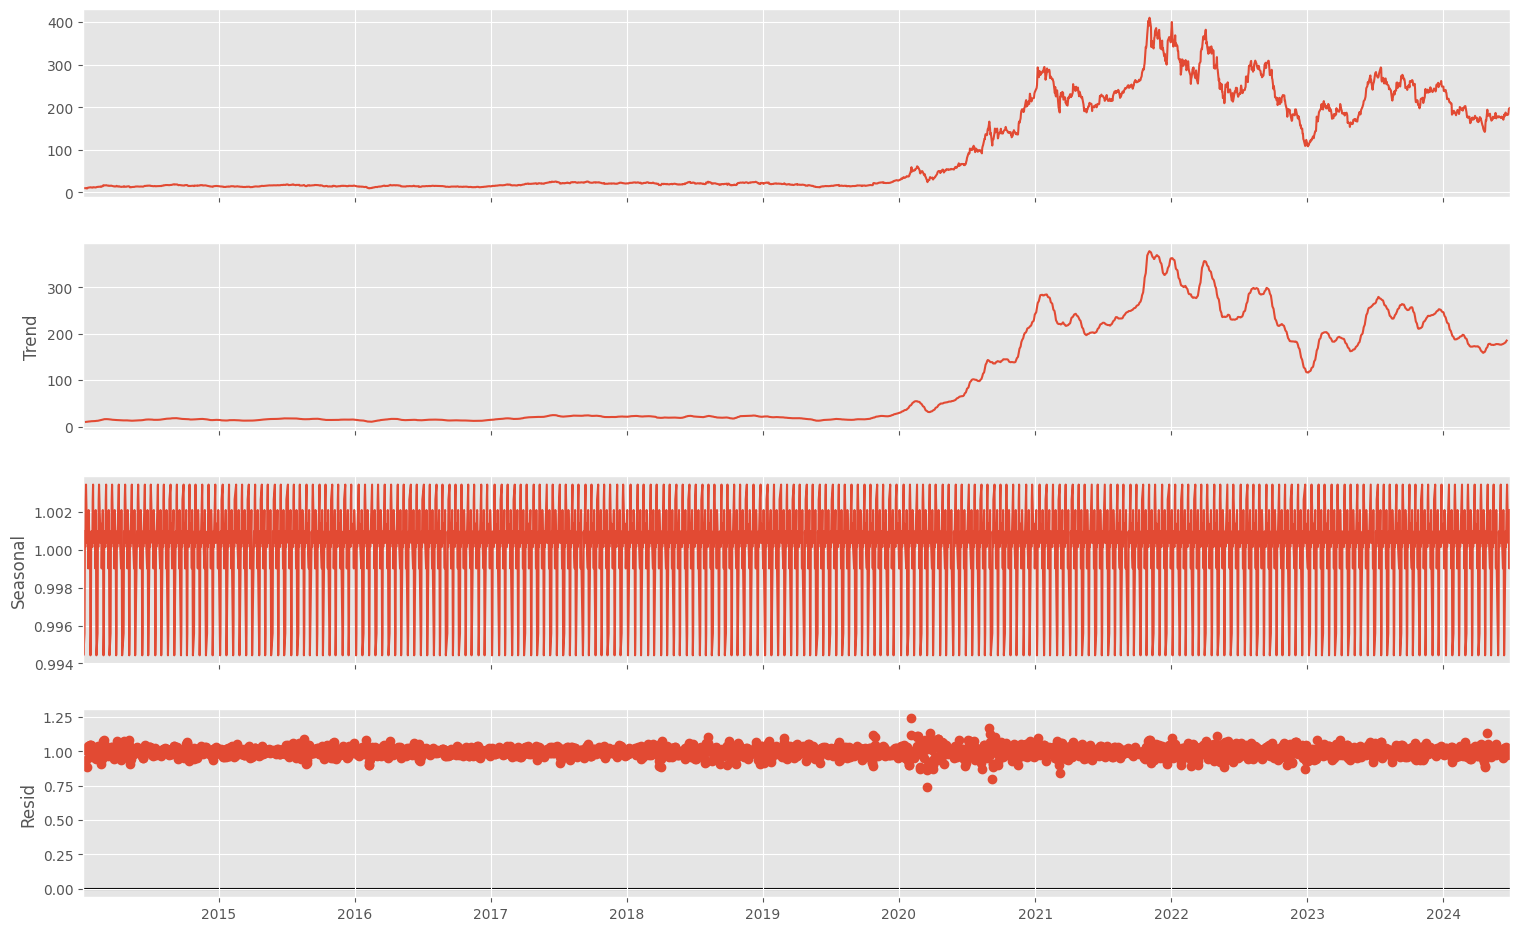

In [222]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=12,model="multiplicative")
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

<Axes: ylabel='Close'>

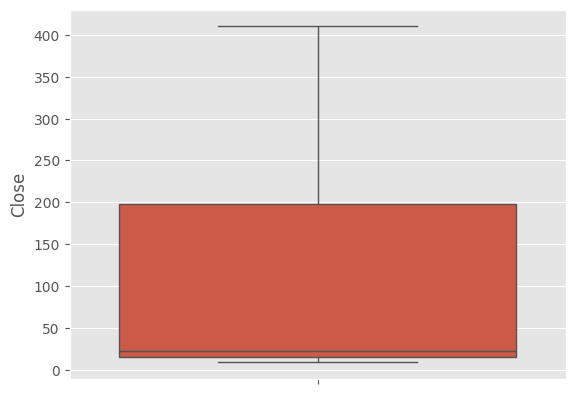

In [224]:
sns.boxplot(stock_data.Close)

<function matplotlib.pyplot.show(close=None, block=None)>

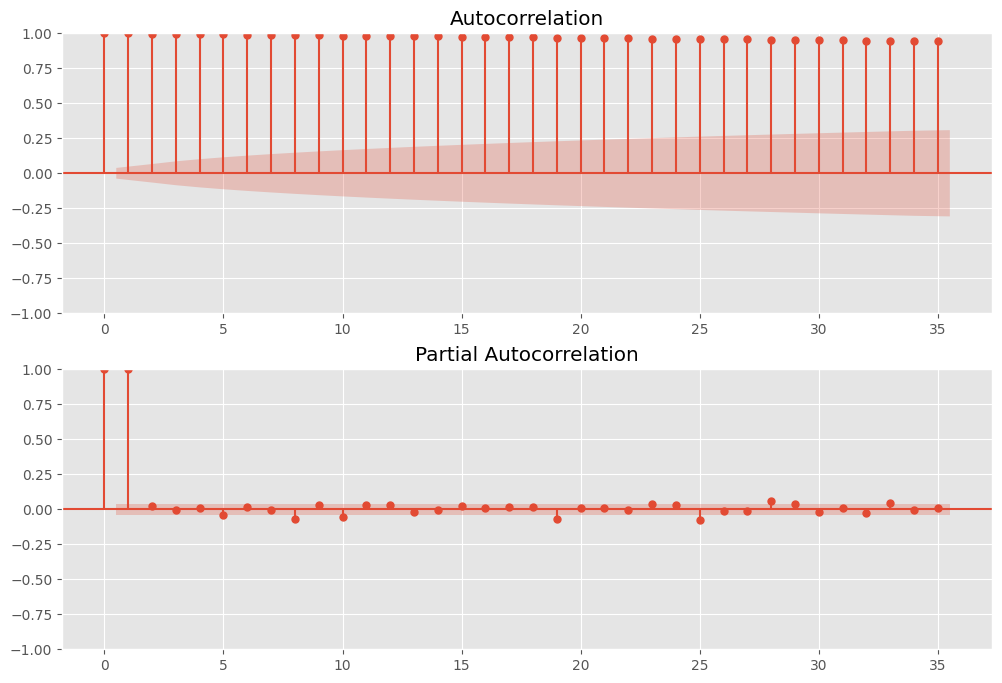

In [225]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig,axes=plt.subplots(2,1,figsize=(12,8))
plot_acf(stock_data,ax=axes[0])
plot_pacf(stock_data,ax=axes[1])
plt.show

making data stationary through diff by defalut its always ist order diff

In [226]:
df_close=df_close.diff()
df_close=df_close.dropna()

In [227]:
df_close

Date
2014-01-03   -0.036000
2014-01-06   -0.170667
2014-01-07    0.157333
2014-01-08    0.128000
2014-01-09   -0.250000
                ...   
2024-06-24   -0.429993
2024-06-25    4.770004
2024-06-26    9.019989
2024-06-27    1.050003
2024-06-28    0.460007
Name: Close, Length: 2639, dtype: float64

In [228]:
test_stationarity(df_close)

TypeError: 'bool' object is not callable

<Figure size 1800x800 with 0 Axes>

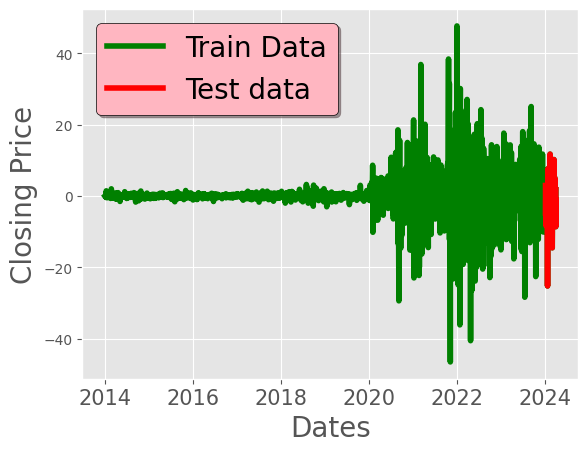

In [229]:
train_data=df_close=df_close[0:-60]

test_data=df_close[-60:]

plt.figuresize=(18,8)

plt.grid=(True)

plt.xlabel("Dates",fontsize=20)

plt.ylabel("Closing Price",fontsize=20)

plt.xticks(fontsize=15)

plt.plot(train_data,"green",label="Train Data",linewidth=4)

plt.plot(test_data,"red",label="Test data",linewidth=4)

plt.legend(fontsize=20, shadow=True,facecolor="lightpink",edgecolor="k")

In [230]:
train_data.shape,test_data.shape

((2579,), (60,))

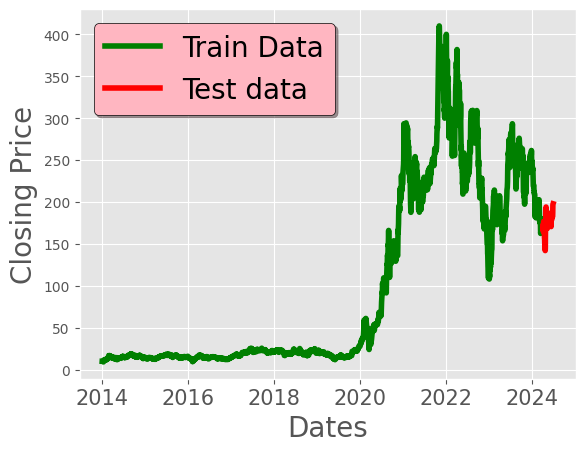

In [231]:
train_data=stock_data[0:-60]

test_data=stock_data[-60:]

plt.figuresize=(18,8)

plt.grid=(True)

plt.xlabel("Dates",fontsize=20)

plt.ylabel("Closing Price",fontsize=20)

plt.xticks(fontsize=15)

plt.plot(train_data,"green",label="Train Data",linewidth=4)

plt.plot(test_data,"red",label="Test data",linewidth=4)

plt.legend(fontsize=20, shadow=True,facecolor="lightpink",edgecolor="k")


In [232]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [233]:
train_data

,Close
Date,
2014-01-02,10.006667
2014-01-03,9.970667
2014-01-06,9.800000
2014-01-07,9.957333
2014-01-08,10.085333
...,...
2024-03-27,179.830002
2024-03-28,175.789993
2024-04-01,175.220001


In [234]:
history= train_data["Close"]

In [235]:
model=ARIMA(history,order=(1,1,1,))

In [240]:
model=model.fit()

In [241]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2580
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8020.488
Date:                Sun, 14 Jul 2024   AIC                          16046.976
Time:                        20:51:27   BIC                          16064.541
Sample:                             0   HQIC                         16053.343
                               - 2580                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6000      0.192     -3.130      0.002      -0.976      -0.224
ma.L1          0.5709      0.197      2.893      0.004       0.184       0.958
sigma2        29.4285      0.297     99.087      0.000      28.846      30.011
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             19055.04
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):             547.22   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [242]:
model.forecast()

2580    168.172039
dtype: float64

In [243]:
test_data=test_data["Close"]
test_data

Date
2024-04-04    171.110001
2024-04-05    164.899994
2024-04-08    172.979996
2024-04-09    176.880005
2024-04-10    171.759995
2024-04-11    174.600006
2024-04-12    171.050003
2024-04-15    161.479996
2024-04-16    157.110001
2024-04-17    155.449997
2024-04-18    149.929993
2024-04-19    147.050003
2024-04-22    142.050003
2024-04-23    144.679993
2024-04-24    162.130005
2024-04-25    170.179993
2024-04-26    168.289993
2024-04-29    194.050003
2024-04-30    183.279999
2024-05-01    179.990005
2024-05-02    180.009995
2024-05-03    181.190002
2024-05-06    184.759995
2024-05-07    177.809998
2024-05-08    174.720001
2024-05-09    171.970001
2024-05-10    168.470001
2024-05-13    171.889999
2024-05-14    177.550003
2024-05-15    173.990005
2024-05-16    174.839996
2024-05-17    177.460007
2024-05-20    174.949997
2024-05-21    186.600006
2024-05-22    180.110001
2024-05-23    173.740005
2024-05-24    179.240005
2024-05-28    176.750000
2024-05-29    176.190002
2024-05-30    178.78

In [244]:
import pandas as pd
from sklearn.metrics import mean_squared_error

In [245]:
mean_squared_error([test_data[0]],model.forecast())

8.631620370659002

In [246]:
np.sqrt(mean_squared_error([test_data[0]],model.forecast()))

2.937961941662792

In [247]:
p_values=range(0,3)
d_values=range(0,3)
q_values=range(0,3)

for i in p_values:
  for j in d_values:
    for k in q_values:
      print(i,j,k)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [248]:
def train_arima_model(X, y, arima_order):
  history=[x for x in X]
  predictions=list()
  for t in range(len(y)):
    model=ARIMA(history,order=arima_order)
    model_fit=model.fit()
    yhat=model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(y[t])
  rmse=np.sqrt(mean_squared_error(y,predictions))
  return rmse

def evaluate_models(dataset, test, p_values, d_values, q_values):
    if isinstance(dataset, pd.DataFrame):
        dataset = dataset["Close"]
    dataset = dataset.astype("float32")
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    rmse = train_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print("ARIMA%s RMSE=%.3f" % (order, rmse))
                except Exception as e:
                    print(f"Error with ARIMA{order}: {e}")
                    continue
    print("Best ARIMA%s RMSE=%.3f" % (best_cfg, best_score))











In [249]:
evaluate_models(train_data,test_data,p_values,d_values,q_values)

ARIMA(0, 0, 0) RMSE=78.395
ARIMA(0, 0, 1) RMSE=41.273
ARIMA(0, 0, 2) RMSE=27.500
ARIMA(0, 1, 0) RMSE=6.175
ARIMA(0, 1, 1) RMSE=6.164
ARIMA(0, 1, 2) RMSE=6.167
ARIMA(0, 2, 0) RMSE=9.121
ARIMA(0, 2, 1) RMSE=6.172
ARIMA(0, 2, 2) RMSE=6.160
ARIMA(1, 0, 0) RMSE=6.181
ARIMA(1, 0, 1) RMSE=6.170
ARIMA(1, 0, 2) RMSE=6.174
ARIMA(1, 1, 0) RMSE=6.164
ARIMA(1, 1, 1) RMSE=6.190
ARIMA(1, 1, 2) RMSE=6.195
ARIMA(1, 2, 0) RMSE=7.799
ARIMA(1, 2, 1) RMSE=6.161
ARIMA(1, 2, 2) RMSE=6.173
ARIMA(2, 0, 0) RMSE=6.171
ARIMA(2, 0, 1) RMSE=6.194
ARIMA(2, 0, 2) RMSE=6.169
ARIMA(2, 1, 0) RMSE=6.169
ARIMA(2, 1, 1) RMSE=6.185
ARIMA(2, 1, 2) RMSE=6.192
ARIMA(2, 2, 0) RMSE=6.719
ARIMA(2, 2, 1) RMSE=6.165
ARIMA(2, 2, 2) RMSE=6.160
Best ARIMA(2, 2, 2) RMSE=6.160


NameError: name 'fc_series' is not defined

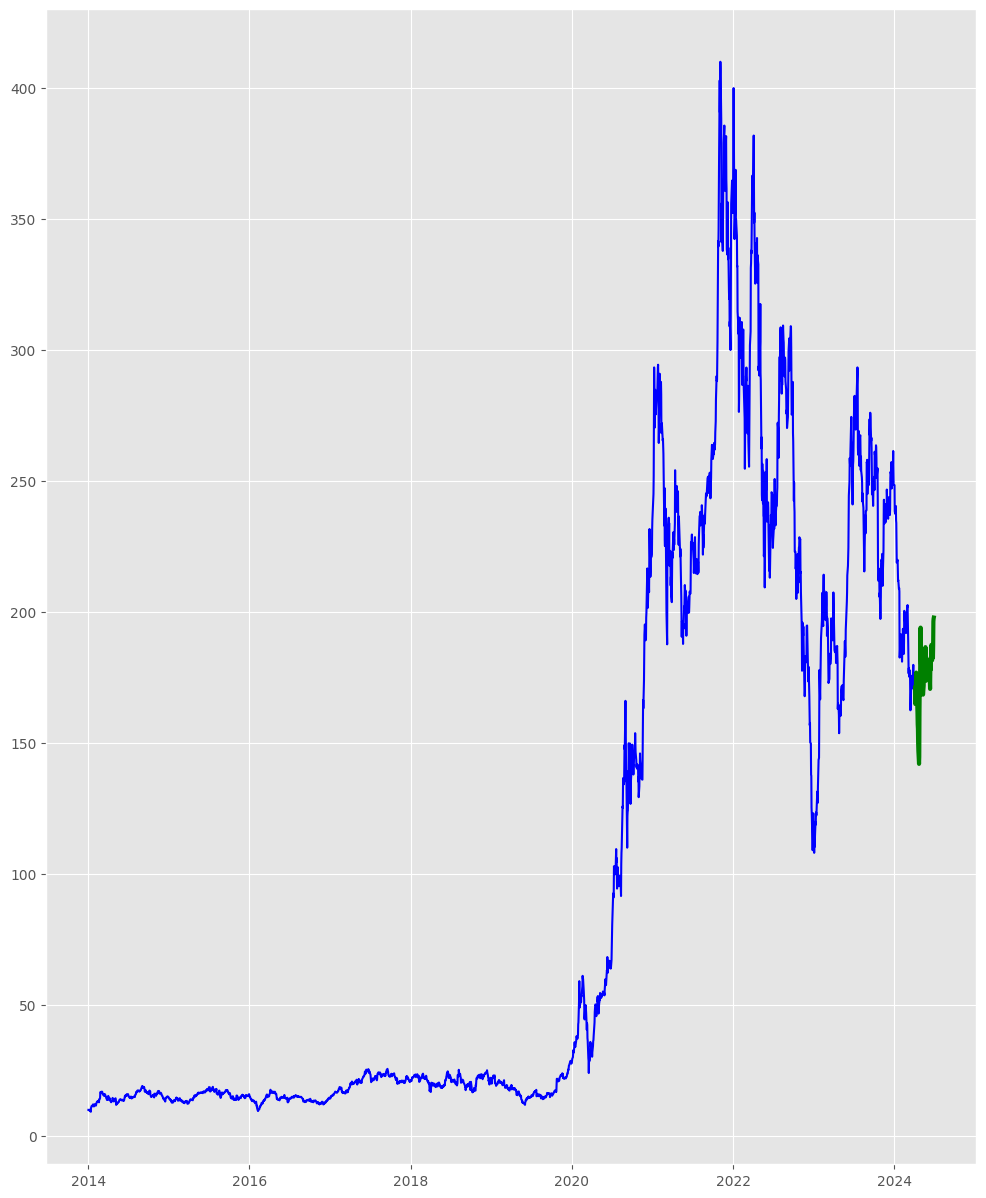

In [250]:
plt.figure(figsize=(12, 15), dpi=100)
plt.plot(train_data["Close"], label="Training", color="blue")
plt.plot(test_data, label="Test", color="green", linewidth=3)
plt.plot(fc_series, label="Forecast", color="red")
plt.title("Forecast vs Actuals on test data")
plt.legend(loc="upper left", fontsize=8)
plt.show()